In [1]:
# IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# LOADING THE DATA
data = pd.read_csv('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.csv')
data

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3


In [3]:
# So,here we drop the EmpNumber column because it's a unique serial number
data.drop('EmpNumber',axis=1,inplace=True)

###  NOTE:
EDA related visualizations are in the data_exploratory_analysis.ipynb and data_processing.ipynb files

## 1. Department-wise Performance Ratings

In [6]:
department_performance = data.groupby("EmpDepartment")["PerformanceRating"].mean().sort_values(ascending=False)
print("\nDepartment-wise Performance Ratings:\n", department_performance)


Department-wise Performance Ratings:
 EmpDepartment
Development               3.085873
Data Science              3.050000
Human Resources           2.925926
Research & Development    2.921283
Sales                     2.860590
Finance                   2.775510
Name: PerformanceRating, dtype: float64


#### Insights
Department-wise Performance
1. **Top Performing Departments**:
- Development (3.08)
- Data Science (3.05)
2. **Lowest Performing Departments**:
- Sales (2.86)
- Finance (2.77)

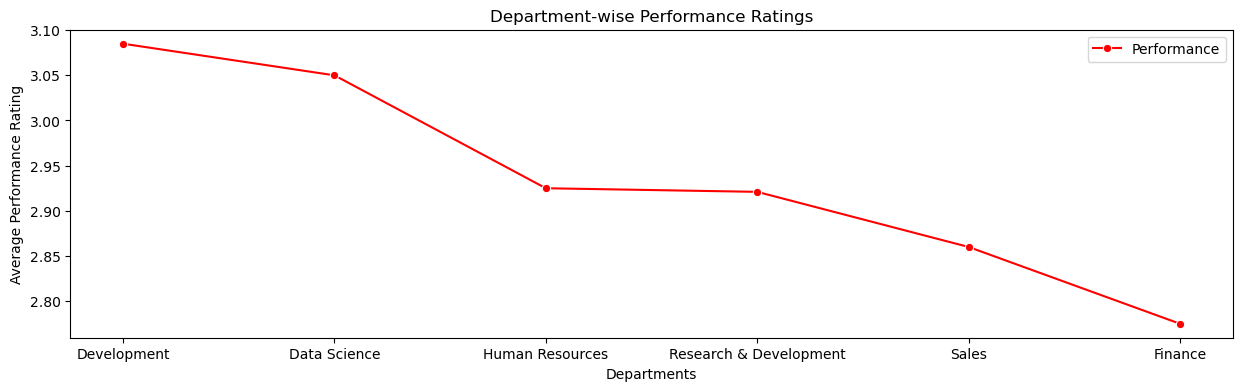

In [8]:
# Visualization
departments = ['Development', 'Data Science', 'Human Resources', 'Research & Development', 'Sales', 'Finance']
performance = [3.085, 3.050, 2.925, 2.921, 2.860, 2.775]

plt.figure(figsize=(15,4))
sns.lineplot(x=departments, y=performance, marker='o', color='red', label="Performance")
plt.xlabel("Departments")
plt.ylabel("Average Performance Rating")
plt.title("Department-wise Performance Ratings")
plt.show()

#### Conclusion
Department-wise analysis provides detailed insights into employee performance. This information is critical for tailoring strategies to improve performance in specific departments.

## 2. Top 3 Factors Effecting Employee Performance
- EmpEnvironmentSatisfaction (0.40 correlation) - Employees who rate their work environment highly tend to perform better.
- EmpLastSalaryHikePercent (0.33 correlation) - Higher salary hikes are linked to better performance.
- YearsSinceLastPromotion (0.25 correlation) - Employees who go longer without a promotion tend to perform worse.

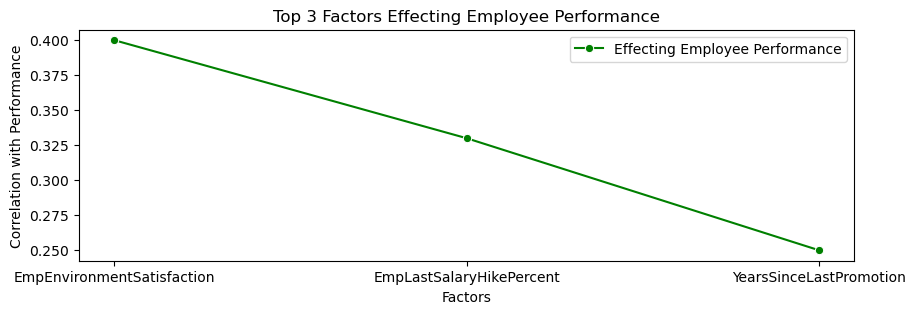

In [11]:
# Three factors effecting employee performance from the data_processing.ipynb file
factors = ['EmpEnvironmentSatisfaction', 'EmpLastSalaryHikePercent', 'YearsSinceLastPromotion']
correlations = [0.40, 0.33, 0.25]

plt.figure(figsize=(10,3))
sns.lineplot(x=factors, y=correlations, marker='o', color='green', label="Effecting Employee Performance")
plt.xlabel("Factors")
plt.ylabel("Correlation with Performance")
plt.title("Top 3 Factors Effecting Employee Performance")
plt.show()

#### Conclusion:
The identification of these top factors provides actionable insights for INX Future Inc. to refine their employee development and retention programs, ultimately boosting organizational performance.

## 3. MODEL COMPARISON REPORT

In [14]:
# Models along with their accuracy scores from the train_model & predict_model.ipynb file

# Creating a dictionary for models and their accuracy_score
comparison_dict = {'Model': ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier','KNeighborsClassifier','MLPClassifier','SVC'],
                   'accuracy_score': [0.7750, 0.8958, 0.9500, 0.9375, 0.6542, 0.8833, 0.8458]}

# Creating DataFrame
comparison_df = pd.DataFrame(comparison_dict)
print(comparison_df.to_string(index=False))

                     Model  accuracy_score
        LogisticRegression          0.7750
    DecisionTreeClassifier          0.8958
    RandomForestClassifier          0.9500
GradientBoostingClassifier          0.9375
      KNeighborsClassifier          0.6542
             MLPClassifier          0.8833
                       SVC          0.8458


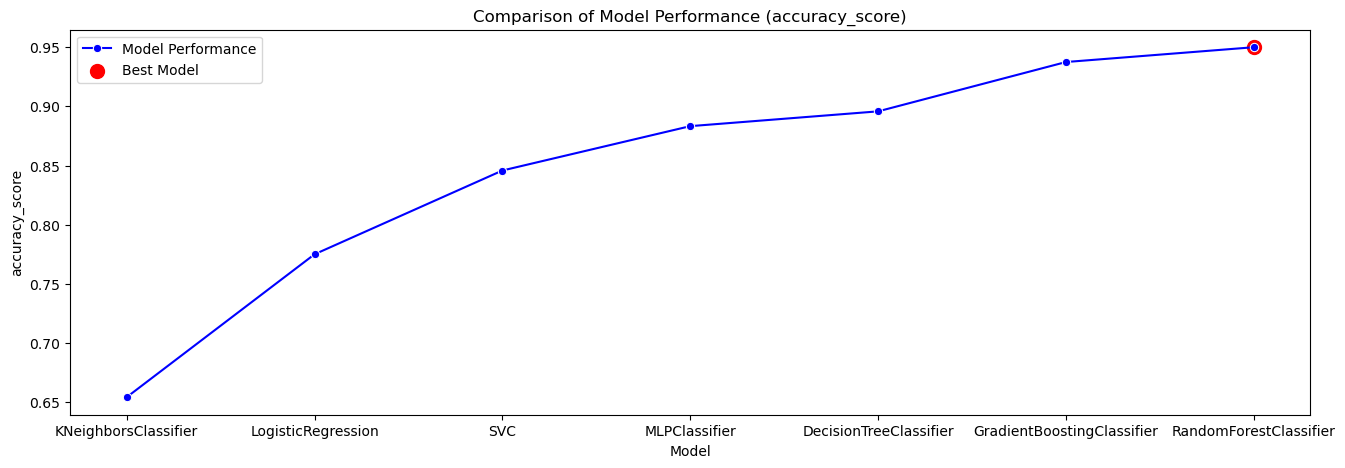

In [15]:
# Visualization
comparison_df = comparison_df.sort_values(by='accuracy_score', ascending=True)

max_index = comparison_df['accuracy_score'].idxmax()  # This returns the row index having highest accuracy_score

plt.figure(figsize=(16, 5))
sns.lineplot(data=comparison_df, x='Model', y='accuracy_score', marker='o', color='blue', label="Model Performance")

plt.scatter(comparison_df.loc[max_index, 'Model'], comparison_df.loc[max_index, 'accuracy_score'],color='red', s=100, label="Best Model")

plt.xlabel("Model")
plt.ylabel("accuracy_score")
plt.legend()
plt.title("Comparison of Model Performance (accuracy_score)")
plt.show()

#### Conclusion:
- For this specific dataset and task, the **RandomForestClassifier** is the most effective model.
- **RandomForestClassifier** model helps HR to predict employee performance during hiring and training decisions.

## 4. RECOMMENDATIONS

- **Improve Workplace Environment** - Enhance employee engagement and work-life balance initiatives.

- **Performance-Based Salary Hikes** - Implement a transparent system linking salary hikes to performance.

- **Frequent Promotions & Career Growth Plans** - Encourage employee motivation through structured career progression.

- **Targeted Training for Low-Performing Departments** - Finance and Sales teams should undergo specialized training.

- **Data-Driven Hiring** - Use the predictive model to hire high-potential employees.

#### Conclusion:
By implementing these recommendations, INX Future Inc. can further enhance employee performance, engagement, and satisfaction, leading to a more productive and successful organization.